# HCPC temperature

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools.datasets import load_temperature2
X = load_temperature2( )
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Bordeaux to Dublin
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     25 non-null     float64
 1   Fev     25 non-null     float64
 2   Mars    25 non-null     float64
 3   Avril   25 non-null     float64
 4   Mai     25 non-null     float64
 5   Juin    25 non-null     float64
 6   Juil    25 non-null     float64
 7   Août    25 non-null     float64
 8   Sept    25 non-null     float64
 9   Oct     25 non-null     float64
 10  Nov     25 non-null     float64
 11  Dec     25 non-null     float64
 12  moy     15 non-null     float64
 13  amp     15 non-null     float64
 14  Lati    15 non-null     float64
 15  Long    15 non-null     float64
 16  groupe  15 non-null     object 
dtypes: float64(16), object(1)
memory usage: 3.5+ KB


In [3]:
from scientisttools.decomposition import PCA
res_pca = PCA(standardize=True,n_components=5,ind_sup=list(range(15,X.shape[0])),quanti_sup=list(range(12,16)),quali_sup=16,parallelize=True)
res_pca.fit(X)

Missing values are imputed by the mean of the variable.


PCA(ind_sup=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24], parallelize=True,
    quali_sup=16, quanti_sup=[12, 13, 14, 15])

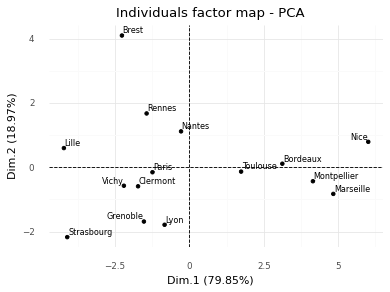

In [4]:
from scientisttools.ggplot import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel=True,ind_sup=False,quali_sup=False)
print(p)

> L'observation graphique propose 3 groupes :
> * Groupe 1 : Brest, Rennes et Nantes
> * Groupe 2 : Nice, Bordeaux, Toulouse, Montpellier et Marseille
> * Groupe 3 : le reste


In [5]:
from scientisttools.clustering import HCPC
res_hcpc = HCPC(res_pca,n_clusters=3)

## Description of quantitatives variables

In [6]:
desc_var = res_hcpc.desc_var_
desc_var.keys()

dict_keys(['quanti_var', 'quanti', 'test_chi2', 'category', 'call'])

### Description of quantitatives variables in overall cluster

In [7]:
quanti_var = desc_var["quanti_var"]
quanti_var

,Eta2,pvalue
moy,0.836587,0.000019
Oct,0.836220,0.000019
Sept,0.830080,0.000024
Fev,0.822729,0.000031
Mars,0.812639,0.000043
Jan,0.811794,0.000044
Nov,0.808300,0.000050
Avril,0.792899,0.000079
Dec,0.787085,0.000093
Août,0.786378,0.000095


### Description of quantitatives variables by cluster

In [8]:
quanti = desc_var["quanti"]
quanti["1"]

,vtest,pvalue,mean in category,overall mean,sd in categorie,overall sd
Sept,3.398358,0.000678,19.280000,16.986667,0.754718,1.785447
moy,3.387913,0.000704,13.796667,11.813889,0.741069,1.548427
Avril,3.329339,0.000871,12.700000,10.980000,0.579655,1.366846
Oct,3.322273,0.000893,14.540000,12.320000,0.941488,1.767937
Mars,3.235769,0.001213,10.040000,8.233333,0.523832,1.477235
Août,3.176011,0.001493,21.900000,19.566667,0.792465,1.943765
Juin,3.003021,0.002673,19.800000,17.833333,0.726636,1.732692
Mai,2.997205,0.002725,16.080000,14.433333,0.691086,1.453578
Nov,2.965719,0.003020,9.880000,7.926667,0.998799,1.742591
Juil,2.915782,0.003548,22.100000,19.833333,1.003992,2.056750


In [9]:
# Cluster 2
quanti["2"]

,vtest,pvalue,mean in category,overall mean,sd in categorie,overall sd
Mai,-2.016380,0.043760,12.866667,14.433333,0.953357,1.453578
Août,-2.021201,0.043259,17.466667,19.566667,1.087300,1.943765
Juin,-2.051475,0.040221,15.933333,17.833333,1.158543,1.732692
Juil,-2.183050,0.029032,17.433333,19.833333,1.347426,2.056750
Long,-2.875244,0.004037,-2.343333,2.583333,1.376889,3.205624
amp,-2.952095,0.003156,12.366667,15.913333,1.558489,2.247626


In [10]:
# Cluster 3
quanti["3"]

,vtest,pvalue,mean in category,overall mean,sd in categorie,overall sd
Sept,-2.046173,0.040739,15.942857,16.986667,0.738448,1.785447
Avril,-2.107041,0.035114,10.157143,10.980000,0.636637,1.366846
moy,-2.603897,0.009217,10.661905,11.813889,0.620737,1.548427
Oct,-2.811187,0.004936,10.900000,12.320000,0.661168,1.767937
Mars,-2.854433,0.004311,7.028571,8.233333,0.806605,1.477235
Nov,-3.152395,0.001619,6.357143,7.926667,0.654342,1.742591
Fev,-3.250132,0.001154,3.157143,4.833333,0.763183,1.805055
Dec,-3.283930,0.001024,3.071429,4.846667,0.911379,1.892042
Jan,-3.355280,0.000793,2.114286,3.973333,0.875750,1.939232


## Description by individuals

In [11]:
desc_ind = res_hcpc.desc_ind_
desc_ind.keys()

dict_keys(['para', 'dist'])

### Paragons

In [12]:
para = desc_ind["para"]
para["Cluster : 1"]

Montpellier    0.175490
Bordeaux       1.302643
Marseille      1.423228
Nice           5.027258
Toulouse       5.088993
Name: distance, dtype: float64

In [13]:
para["Cluster : 2"]

Rennes    0.410280
Nantes    2.514486
Brest     4.182422
Name: distance, dtype: float64

In [14]:
para["Cluster : 3"]

Vichy       0.183210
Clermont    0.446900
Grenoble    1.401182
Paris       1.793753
Lyon        2.822719
Name: distance, dtype: float64

## Description by axis

In [15]:
desc_axes = res_hcpc.desc_axes_
desc_axes.keys()

dict_keys(['quanti_var', 'quanti', 'call'])

In [16]:
desc_axes["quanti_var"]

,Eta2,pvalue
Dim.1,0.834734,0.000020
Dim.2,0.633565,0.002421


In [19]:
desc_axes_quanti = desc_axes["quanti"]
desc_axes_quanti["1"]

,vtest,pvalue,mean in category,overall mean,sd in categorie,overall sd
Dim.1,3.392217,0.000693,3.968786,-4.144833e-15,1.45853,3.095445


In [20]:
desc_axes_quanti["2"]

,vtest,pvalue,mean in category,overall mean,sd in categorie,overall sd
Dim.2,2.843227,0.004466,2.292998,2.116825e-15,1.293129,1.50878


In [21]:
desc_axes_quanti["3"]

,vtest,pvalue,mean in category,overall mean,sd in categorie,overall sd
Dim.2,-2.113402,0.034566,-0.911045,2.116825e-15,0.927073,1.508780
Dim.1,-2.561180,0.010432,-2.265141,-4.144833e-15,1.260674,3.095445


                Dim.1     Dim.2     Dim.3     Dim.4     Dim.5 Cluster
Bordeaux     3.120707  0.109297 -0.720835 -0.014675 -0.007840       1
Brest       -2.268005  4.093307  0.114881 -0.040599 -0.097715       2
Clermont    -1.725936 -0.592532 -0.019106 -0.166854  0.147562       3
Grenoble    -1.529258 -1.687948 -0.137490 -0.399736 -0.283051       3
Lille       -4.216825  0.595201  0.355881 -0.004934 -0.038816       3
Lyon        -0.834940 -1.788228 -0.022975 -0.022642  0.055519       3
Marseille    4.832722 -0.828803  0.356584  0.150638  0.043617       1
Montpellier  4.147302 -0.435351  0.183257  0.023849  0.042365       1
Nantes      -0.281289  1.114563 -0.228187  0.119082  0.045068       2
Nice         6.007035  0.789308  0.204813  0.066916 -0.185639       1
Paris       -1.241938 -0.156346 -0.218191  0.336330  0.002599       3
Rennes      -1.438653  1.671122 -0.152318  0.025601  0.103115       2
Strasbourg  -4.105600 -2.172253  0.034570  0.372249 -0.089791       3
Toulouse     1.73616

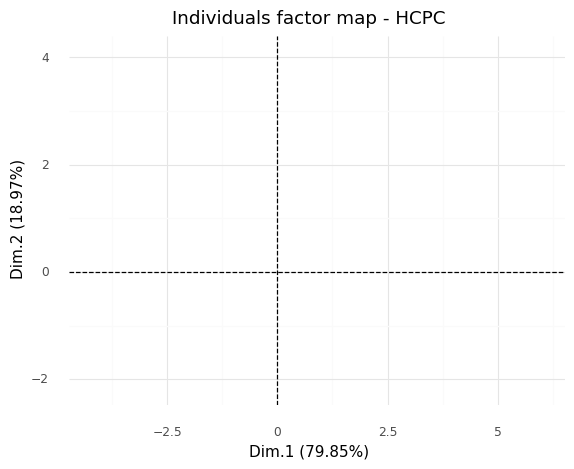

In [17]:
from scientisttools.ggplot import fviz_hcpc_cluster
p = fviz_hcpc_cluster(res_hcpc,geom_type="point",add_ellipse=False,repel=False)
print(p)